In [1]:
# Requirements 
# !pip3 install pandas numpy seaborn 
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
!bash RQ6_Nov19.sh
!bash RQ6_Oct19.sh

2019-Nov.csv
2019-Oct.csv


In [3]:
df_labels = ['2019-Oct.csv.rq6', '2019-Nov.csv.rq6']

In [4]:
nov_rq6 = pd.read_csv('/Users/tommy/Desktop/codici/datasets/2019-Nov.csv.rq6.csv')

In [5]:
octo_rq6 = pd.read_csv('/Users/tommy/Desktop/codici/datasets/2019-Oct.csv.rq6.csv')

In [6]:
tot_rq6 = pd.concat([octo_rq6,nov_rq6]) #about a minute

In [7]:
tot_rq6.head()

,event_type,product_id,category_code,user_id
0,view,44600062,NaN,541312140
1,view,3900821,appliances.environment.water_heater,554748717
2,view,17200506,furniture.living_room.sofa,519107250
3,view,1307067,computers.notebook,550050854
4,view,1004237,electronics.smartphone,535871217


In [8]:
subRQ6 = tot_rq6

In [28]:
subRQ6 = subRQ6.dropna()
subRQ6['category_code'] = [el.split('.')[0] for el in list(subRQ6['category_code']) if type(el) == str]
#df_prod_sold['category_code'] = [el.split('.')[0] for el in list(df_prod_sold['category_code']) if type(el) == str]

<ipython-input-28-a45a3751d013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subRQ6['category_code'] = [el.split('.')[0] for el in list(subRQ6['category_code']) if type(el) == str]


In [9]:
subRQ6.head()

,event_type,product_id,category_code,user_id
0,view,44600062,NaN,541312140
1,view,3900821,appliances.environment.water_heater,554748717
2,view,17200506,furniture.living_room.sofa,519107250
3,view,1307067,computers.notebook,550050854
4,view,1004237,electronics.smartphone,535871217


In [10]:
# obtaining the number of product sold:
# by taking only rows about purchasing
# and at the end we count them (.shape[0])
# shape[0] are the rows of the dataset where the event is equal to purchase
# so it rapresents the product sold

df_prod_sold =  subRQ6[subRQ6['event_type']=='purchase']
prod_sold = df_prod_sold.shape[0]

In [11]:
prod_sold

1659788

In [12]:
# in a similar way we calculate the number of user:
# this time we group by 'user_id' so we obtain the exact users's number
# we extract that number by the command shape[0] (number of rows)
users = subRQ6.groupby('user_id').product_id.count().shape[0]

In [13]:
users

5316649

In [14]:
#finally we calculate the actual purchase rate value
purchase_rate = prod_sold/users
round(purchase_rate,4)

0.3122

In [15]:
#same think of before
df_views = subRQ6[subRQ6['event_type']=='view']
views = df_views.shape[0]

In [16]:
#conversion rate calculated by following the previous formula
conversion_rate = purchase_rate / views
conversion_rate

2.992144008055359e-09

In [17]:
#dropping nas values for both dataframe
df_views = df_views.dropna()
df_prod_sold = df_prod_sold.dropna()


In [18]:
#purchase rate of each category
df_prod_sold['category_code'] = [el.split('.')[0] for el in list(df_prod_sold['category_code']) if type(el) == str]

In [19]:
number_of_sales = df_prod_sold.groupby('category_code').product_id.count()
number_of_sales

category_code
accessories       3741
apparel          22217
appliances      174022
auto             21339
computers        62332
construction     16500
country_yard       132
electronics     916667
furniture        19843
kids             11648
medicine           654
sport             2725
stationery         325
Name: product_id, dtype: int64

In [29]:
# obtaining number of users for each categories
# first step: grouping for categories subRQ6
grouped_subRQ6 = subRQ6.groupby("category_code")

In [30]:
#now we want to extract the number of unique users for each category
user_of_each_cat = grouped_subRQ6.agg({"user_id": "nunique"})
user_of_each_cat.iloc[:,0]

category_code
accessories      115558
apparel          625291
appliances      1087898
auto             287480
computers        547379
construction     219154
country_yard       8221
electronics     3108287
furniture        432412
kids             226201
medicine           7566
sport             82279
stationery         5690
Name: user_id, dtype: int64

In [31]:
#converting into a series
series_of_unique_users = user_of_each_cat.iloc[:,0]

In [32]:
#calculating the purchase rate => 
# number of product sold for each catogory / number of unique user for each category
purchase_rate_for_cat = number_of_sales.divide(series_of_unique_users)
round(purchase_rate_for_cat,4).sort_values(ascending=False)


category_code
electronics     0.2949
appliances      0.1600
computers       0.1139
medicine        0.0864
construction    0.0753
auto            0.0742
stationery      0.0571
kids            0.0515
furniture       0.0459
apparel         0.0355
sport           0.0331
accessories     0.0324
country_yard    0.0161
dtype: float64

In [33]:
# now for the last step of this request 
# we calculate the conversion rate of each categories
# we have yet the purchase rate of product for each category
# in a similar way we are going to calculate the numer of views
# for each category and then we simply divide them.

df_views['category_code'] = [el.split('.')[0] for el in list(df_views['category_code']) if type(el) == str]


In [34]:
number_of_views = df_views.groupby('category_code').product_id.count()
number_of_views


category_code
accessories       616475
apparel          4477518
appliances      12837916
auto             2157706
computers        6297977
construction     1759762
country_yard       31255
electronics     37026582
furniture        3295250
kids             1292002
medicine           34738
sport             415087
stationery         19323
Name: product_id, dtype: int64

In [35]:
coversion_rate_for_categories = purchase_rate_for_cat.divide(number_of_views)
coversion_rate_for_categories.sort_values(ascending=False)


category_code
stationery      2.955946e-06
medicine        2.488322e-06
country_yard    5.137239e-07
sport           7.978815e-08
accessories     5.251365e-08
construction    4.278392e-08
kids            3.985599e-08
auto            3.440124e-08
computers       1.808098e-08
furniture       1.392583e-08
appliances      1.246010e-08
electronics     7.964836e-09
apparel         7.935347e-09
dtype: float64

In [36]:
#now we apply a traslation to plot better the results
coversion_for_plot = ((coversion_rate_for_categories)*10**8).sort_values(ascending=False)


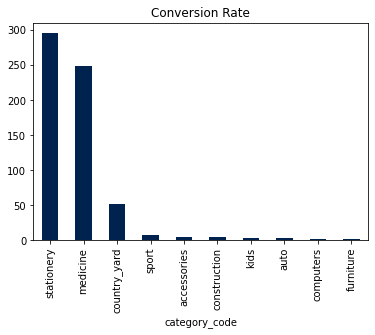

In [45]:
#Series.plot(*args, **kwargs)
coversion_for_plot.head(10).plot(kind = 'bar', title = 'Conversion Rate',
                        colormap = 'cividis')